In [37]:
import pandas as pd
import numpy as np
data1 = pd.read_csv('actividad_marissa.txt', sep=r",", header=None)
data2=pd.read_csv('actividad_ximena.txt', sep=r'\s+', header=None)

data = pd.concat([data1, data2], axis=0, ignore_index=True)

# La primera columna es la clase
y = data.iloc[:, 0].values
# El resto son variables predictoras
x = data.iloc[:, 1:].values

EVALUACIÓN INICIAL DE ALGORITMOS DE CLASIFICACIÓN

In [38]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# Clasificadores
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# Lista de clasificadores
classifiers = {
    "SVM lineal": SVC(kernel='linear'),
    "SVM RBF": SVC(kernel='rbf'),
    "LDA": LDA(),
    "K-NN": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # 2 capas ocultas
}

# Cross-validation
n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    print(f"\n Clasificador: {name}")
    
    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x, y):
        x_train = x[train_index, :]
        y_train = y[train_index]
        x_test = x[test_index, :]
        y_test = y[test_index]

        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    # Reporte de métricas
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))



 Clasificador: SVM lineal
              precision    recall  f1-score   support

         1.0       0.93      0.93      0.93       160
         2.0       0.85      0.89      0.87       200
         3.0       0.88      0.82      0.85       200
         4.0       0.85      0.87      0.86       220
         5.0       0.96      0.98      0.97       210
         6.0       0.88      0.86      0.87       210

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200


 Clasificador: SVM RBF
              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97       160
         2.0       0.86      0.83      0.84       200
         3.0       0.95      0.76      0.84       200
         4.0       0.72      0.90      0.80       220
         5.0       0.91      0.98      0.94       210
         6.0       0.83      0.78      0.80       210

    accuracy              

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score


# Validación cruzada estratificada
kf = StratifiedKFold(n_splits=5, shuffle=True)

# Modelos
models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
     "Extra Trees": ExtraTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Ridge Classifier": RidgeClassifier()
}

# Evaluación
for name, model in models.items():
    print(f"\n{name}")
    
    # Predicciones cruzadas
    y_pred = cross_val_predict(model, x, y, cv=kf)

    
    # Precisión y sensibilidad por clase
    report = classification_report(y, y_pred, digits=4)
    print(report)


Random Forest
              precision    recall  f1-score   support

         1.0     0.9935    0.9625    0.9778       160
         2.0     0.9646    0.9550    0.9598       200
         3.0     0.9674    0.8900    0.9271       200
         4.0     0.8707    0.9182    0.8938       220
         5.0     0.9444    0.9714    0.9577       210
         6.0     0.8791    0.9000    0.8894       210

    accuracy                         0.9317      1200
   macro avg     0.9366    0.9329    0.9343      1200
weighted avg     0.9332    0.9317    0.9320      1200


Naive Bayes
              precision    recall  f1-score   support

         1.0     0.9934    0.9375    0.9646       160
         2.0     0.9340    0.9200    0.9270       200
         3.0     0.9244    0.7950    0.8548       200
         4.0     0.8208    0.8955    0.8565       220
         5.0     0.9573    0.9619    0.9596       210
         6.0     0.7991    0.8714    0.8337       210

    accuracy                         0.8958      

OPTIMIZACIÓN DE LOS MODELOS DE CLASIFICACIÓN

- SVM lineal

----- SVM classifier - Regularization parameter -----
---- c = 1e-06
ACC: 0.22916666666666666
---- c = 2.335721469090121e-06
ACC: 0.28250000000000003
---- c = 5.455594781168514e-06
ACC: 0.3125
---- c = 1.274274985703132e-05
ACC: 0.375
---- c = 2.9763514416313192e-05
ACC: 0.4066666666666666
---- c = 6.951927961775606e-05
ACC: 0.655
---- c = 0.0001623776739188721
ACC: 0.7583333333333332
---- c = 0.000379269019073225
ACC: 0.825
---- c = 0.0008858667904100823
ACC: 0.8608333333333335
---- c = 0.002069138081114788
ACC: 0.8799999999999999
---- c = 0.004832930238571752
ACC: 0.8925000000000001
---- c = 0.011288378916846883
ACC: 0.8983333333333332
---- c = 0.026366508987303555
ACC: 0.9025000000000001
---- c = 0.061584821106602544
ACC: 0.905
---- c = 0.14384498882876628
ACC: 0.9
---- c = 0.3359818286283781
ACC: 0.8991666666666667
---- c = 0.7847599703514607
ACC: 0.8933333333333333
---- c = 1.8329807108324339
ACC: 0.8866666666666667
---- c = 4.281332398719387
ACC: 0.8724999999999999
---- c = 10.0


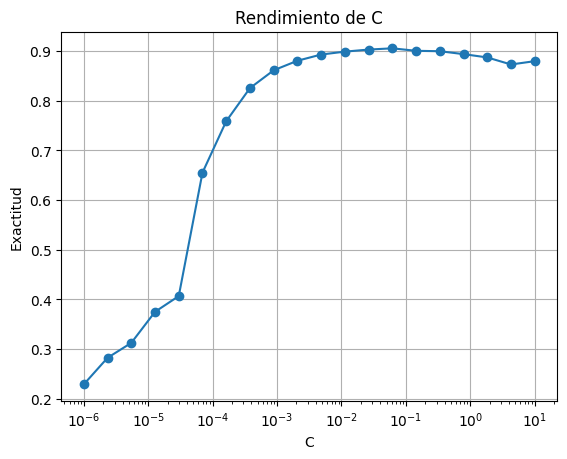

SVC(C=np.float64(0.061584821106602544), kernel='linear')

In [40]:
import matplotlib.pyplot as plt
print("----- SVM classifier - Regularization parameter -----")

cc = np.logspace(-6, 1, 20)  # desde 1e-6 hasta 10

acc = []

for c in cc:
    print('---- c =', c)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = SVC(C=c, kernel='linear')             

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal c: ", opt_hyperparameter)

plt.plot(cc, acc, marker='o')
plt.xscale('log')
plt.title('Rendimiento de C')
plt.xlabel("C")
plt.ylabel("Exactitud")
plt.grid(True)

plt.show()

# Fit model with optimal hyperparameters
clf = SVC(C=opt_hyperparameter, kernel = 'linear')   
clf.fit(x, y)

---- n features = 1
ACC: 0.5866666666666667
---- n features = 2
ACC: 0.6916666666666668
---- n features = 3
ACC: 0.7666666666666667
---- n features = 4
ACC: 0.8016666666666667
---- n features = 5
ACC: 0.8108333333333333
---- n features = 6
ACC: 0.8533333333333333
---- n features = 7
ACC: 0.8725000000000002
---- n features = 8
ACC: 0.8708333333333333
---- n features = 9
ACC: 0.8724999999999999
---- n features = 10
ACC: 0.8883333333333333
---- n features = 11
ACC: 0.8941666666666667
---- n features = 12
ACC: 0.8966666666666667
---- n features = 13
ACC: 0.8925000000000001
---- n features = 14
ACC: 0.9008333333333333
---- n features = 15
ACC: 0.9033333333333333
---- n features = 16
ACC: 0.8966666666666667
---- n features = 17
ACC: 0.8975
---- n features = 18
ACC: 0.8966666666666667
---- n features = 19
ACC: 0.8933333333333332
---- n features = 20
ACC: 0.89
---- n features = 21
ACC: 0.8925000000000001
---- n features = 22
ACC: 0.8949999999999999
---- n features = 23
ACC: 0.8949999999999999


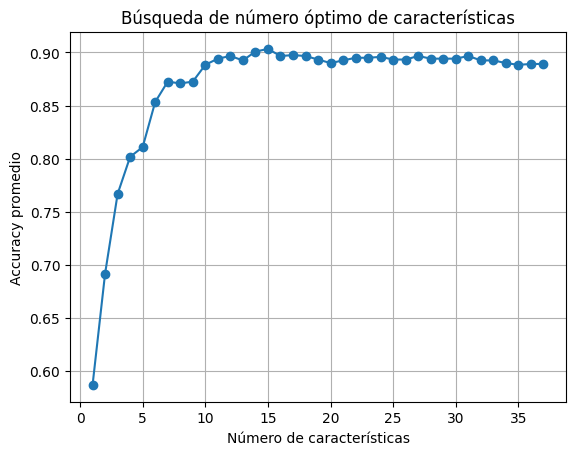


----- GridSearchCV con features óptimas -----
Mejor valor de C: 0.7847599703514607

--- Evaluación final (CV externa con C óptima y features óptimas) ---
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.95       160
         2.0       0.90      0.92      0.91       200
         3.0       0.94      0.85      0.89       200
         4.0       0.84      0.91      0.88       220
         5.0       0.94      0.98      0.96       210
         6.0       0.88      0.85      0.86       210

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200



In [41]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Buscar número óptimo de características
n_feats = list(range(1, 38))
acc_nfeat = []

for n_feat in n_feats:
    print(f"---- n features = {n_feat}")
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(x, y):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]

        base_model = SVC(kernel='linear')
        selector = RFE(base_model, n_features_to_select=n_feat)
        selector.fit(x_train, y_train)

        x_train_sel = selector.transform(x_train)
        x_test_sel = selector.transform(x_test)

        base_model.fit(x_train_sel, y_train)
        y_pred = base_model.predict(x_test_sel)

        acc_cv.append(accuracy_score(y_test, y_pred))

    acc = np.mean(acc_cv)
    acc_nfeat.append(acc)
    print("ACC:", acc)

# Elegir número óptimo de características
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("\n Optimal number of features:", opt_features)

# Graficar
plt.plot(n_feats, acc_nfeat, marker='o')
plt.xlabel("Número de características")
plt.ylabel("Accuracy promedio")
plt.title("Búsqueda de número óptimo de características")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# Reentrenar modelo con las features óptimas + GridSearchCV
# ---------------------------------------------------------
print("\n----- GridSearchCV con features óptimas -----")
selector = RFE(SVC(kernel='linear'), n_features_to_select=opt_features)
x_selected = selector.fit_transform(x, y)

parameters = {'C': np.logspace(-6, 1, 20)}
grid_search = GridSearchCV(SVC(kernel='linear'), parameters, cv=5)
grid_search.fit(x_selected, y)

print("Mejor valor de C:", grid_search.best_params_['C'])

# Evaluación final
final_model = SVC(kernel='linear', C=grid_search.best_params_['C'])
final_model.fit(x_selected, y)

print("\n--- Evaluación final (CV externa con C óptima y features óptimas) ---")
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test, cv_y_pred = [], []

for train_index, test_index in kf.split(x, y):
    x_train, y_train = x[train_index], y[train_index]
    x_test, y_test = x[test_index], y[test_index]

    x_train_sel = selector.transform(x_train)
    x_test_sel = selector.transform(x_test)

    final_model.fit(x_train_sel, y_train)
    y_pred = final_model.predict(x_test_sel)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

-  Random Forest

----- Random Forest - Variación de n_estimators -----
n_estimators = 10
Accuracy promedio: 0.9016666666666666
n_estimators = 30
Accuracy promedio: 0.925
n_estimators = 50
Accuracy promedio: 0.9174999999999999
n_estimators = 70
Accuracy promedio: 0.9324999999999999
n_estimators = 90
Accuracy promedio: 0.9308333333333334
n_estimators = 110
Accuracy promedio: 0.9258333333333333
n_estimators = 130
Accuracy promedio: 0.9233333333333332
n_estimators = 150
Accuracy promedio: 0.9274999999999999
n_estimators = 170
Accuracy promedio: 0.9308333333333334
n_estimators = 190
Accuracy promedio: 0.9225


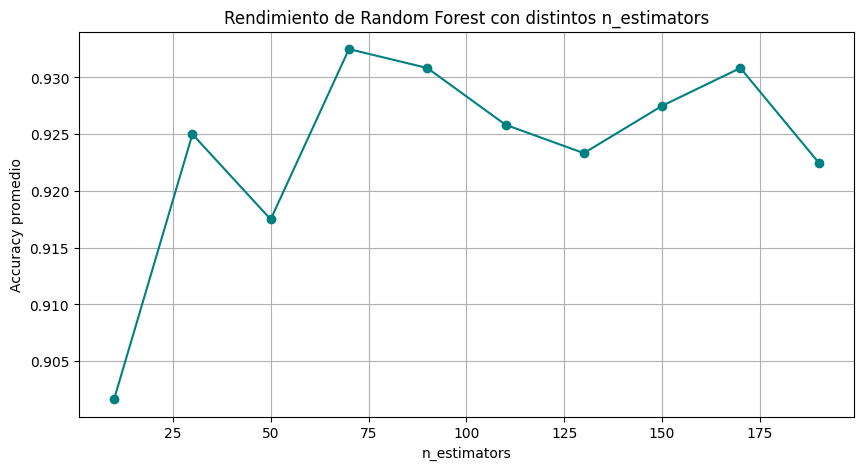

In [42]:
# ------------------ B) Gráfica rendimiento por n_estimators -------------------
print("----- Random Forest - Variación de n_estimators -----")

n_estimators_range = np.arange(10, 210, 20)
acc = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for n in n_estimators_range:
    print(f'n_estimators = {n}')
    acc_cv = []

    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = RandomForestClassifier(n_estimators=n)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc_cv.append(accuracy_score(y_test, y_pred))

    acc_avg = np.mean(acc_cv)
    acc.append(acc_avg)
    print("Accuracy promedio:", acc_avg)

plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, acc, marker='o', color='teal')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy promedio")
plt.title("Rendimiento de Random Forest con distintos n_estimators")
plt.grid(True)
plt.show()

---- n features = 1
ACC: 0.6166666666666667
---- n features = 2
ACC: 0.7483333333333333
---- n features = 3
ACC: 0.8216666666666667
---- n features = 4
ACC: 0.8566666666666667
---- n features = 5
ACC: 0.8666666666666668
---- n features = 6
ACC: 0.86
---- n features = 7
ACC: 0.8758333333333332
---- n features = 8
ACC: 0.8825
---- n features = 9
ACC: 0.8783333333333333
---- n features = 10
ACC: 0.8866666666666665
---- n features = 11
ACC: 0.8916666666666666
---- n features = 12
ACC: 0.8966666666666667
---- n features = 13
ACC: 0.9058333333333334
---- n features = 14
ACC: 0.9058333333333334
---- n features = 15
ACC: 0.9099999999999999
---- n features = 16
ACC: 0.9083333333333334
---- n features = 17
ACC: 0.9133333333333333
---- n features = 18
ACC: 0.9200000000000002
---- n features = 19
ACC: 0.9199999999999999
---- n features = 20
ACC: 0.9175000000000001
---- n features = 21
ACC: 0.9183333333333333
---- n features = 22
ACC: 0.9200000000000002
---- n features = 23
ACC: 0.9241666666666667


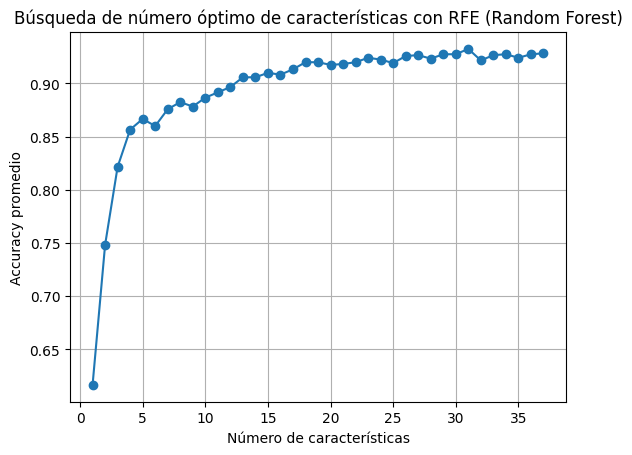


----- GridSearchCV con features óptimas -----
 Mejor valor de n_estimators: 200

--- Evaluación final (CV externa con n_estimators óptimo y features óptimas) ---
              precision    recall  f1-score   support

         1.0       0.99      0.96      0.97       160
         2.0       0.96      0.96      0.96       200
         3.0       0.98      0.90      0.93       200
         4.0       0.86      0.91      0.89       220
         5.0       0.94      0.97      0.96       210
         6.0       0.89      0.89      0.89       210

    accuracy                           0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200



In [43]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Buscar número óptimo de características
n_feats = list(range(1, x.shape[1] + 1))  # hasta el número total de features que tengas
acc_nfeat = []

for n_feat in n_feats:
    print(f"---- n features = {n_feat}")
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(x, y):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]

        base_model = RandomForestClassifier(random_state=42)
        selector = RFE(base_model, n_features_to_select=n_feat)
        selector.fit(x_train, y_train)

        x_train_sel = selector.transform(x_train)
        x_test_sel = selector.transform(x_test)

        base_model.fit(x_train_sel, y_train)
        y_pred = base_model.predict(x_test_sel)

        acc_cv.append(accuracy_score(y_test, y_pred))

    acc = np.mean(acc_cv)
    acc_nfeat.append(acc)
    print("ACC:", acc)

# Elegir número óptimo de características
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("\n Optimal number of features:", opt_features)

# Graficar
plt.plot(n_feats, acc_nfeat, marker='o')
plt.xlabel("Número de características")
plt.ylabel("Accuracy promedio")
plt.title("Búsqueda de número óptimo de características con RFE (Random Forest)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# Reentrenar modelo con las features óptimas + GridSearchCV
# ---------------------------------------------------------
print("\n----- GridSearchCV con features óptimas -----")
selector = RFE(RandomForestClassifier(random_state=42), n_features_to_select=opt_features)
x_selected = selector.fit_transform(x, y)

parameters = {'n_estimators': [10, 50, 100, 150, 200, 300]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5)
grid_search.fit(x_selected, y)

print(" Mejor valor de n_estimators:", grid_search.best_params_['n_estimators'])

# Evaluación final
final_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], random_state=42)
final_model.fit(x_selected, y)

print("\n--- Evaluación final (CV externa con n_estimators óptimo y features óptimas) ---")
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test, cv_y_pred = [], []

for train_index, test_index in kf.split(x, y):
    x_train, y_train = x[train_index], y[train_index]
    x_test, y_test = x[test_index], y[test_index]

    x_train_sel = selector.transform(x_train)
    x_test_sel = selector.transform(x_test)

    final_model.fit(x_train_sel, y_train)
    y_pred = final_model.predict(x_test_sel)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
